Dataset nya merupakan kumpulan data nasabah sebuah bank yang digunakan untuk memprediksi apakah seorang nasabah akan melakukan churn (berhenti menjadi pelanggan) atau tidak. Dataset ini berisi informasi demografis dan finansial nasabah, serta perilaku interaksi mereka dengan bank.

Tujuan dari analisis ini adalah untuk membangun model prediktif menggunakan algoritma Neural Network (Jaringan Syaraf Tiruan) yang dapat mengidentifikasi pola-pola yang berhubungan dengan kemungkinan seorang nasabah untuk churn. Model ini diharapkan membantu pihak bank dalam mengambil keputusan strategis untuk mempertahankan nasabah.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, accuracy_score
import io

# Load file yang diupload
df = pd.read_csv(io.BytesIO(uploaded['Churn_Modelling.csv']))

# Buang kolom yang tidak relevan
X = df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])  # Fitur
y = df['Exited']  # Target

# Encode fitur kategorikal
X['Gender'] = LabelEncoder().fit_transform(X['Gender'])  # Male=1, Female=0
X = pd.get_dummies(X, columns=['Geography'], drop_first=True)  # One-hot Geography

# Normalisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Bagi data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Definisikan model Neural Network
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Latih model
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6433 - loss: 0.6557 - val_accuracy: 0.8032 - val_loss: nan
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7970 - loss: 0.4611 - val_accuracy: 0.8114 - val_loss: nan
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8054 - loss: 0.4410 - val_accuracy: 0.8151 - val_loss: nan
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8157 - loss: 0.4176 - val_accuracy: 0.8201 - val_loss: nan
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8152 - loss: 0.4144 - val_accuracy: 0.8282 - val_loss: nan
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8313 - loss: 0.3977 - val_accuracy: 0.8295 - val_loss: nan
Epoch 7/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8315 - loss: 0.3905 - val_accuracy: 0.8357 - val_loss: nan
Epoch 8/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8327 - loss: 0.3899 - val_accuracy: 0.8432 - val_loss: nan


In [ ]:
# Prediksi probabilitas
y_pred_prob = model.predict(X_test)
# Konversi ke 0 atau 1
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluasi
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1599
           1       0.72      0.48      0.58       402

    accuracy                           0.86      2001
   macro avg       0.80      0.72      0.75      2001
weighted avg       0.85      0.86      0.85      2001

Accuracy: 0.8590704647676162


Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8650 - loss: 0.3362 - val_accuracy: 0.8595 - val_loss: nan
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8616 - loss: 0.3295 - val_accuracy: 0.8582 - val_loss: nan
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8633 - loss: 0.3260 - val_accuracy: 0.8538 - val_loss: nan
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8632 - loss: 0.3381 - val_accuracy: 0.8582 - val_loss: nan
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8726 - loss: 0.3130 - val_accuracy: 0.8557 - val_loss: nan
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8555 - loss: 0.3456 - val_accuracy: 0.8601 - val_loss: nan
Epoch 7/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8654 - loss: 0.3311 - val_accuracy: 0.8601 - val_loss: nan
Epoch 8/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8686 - loss: 0.3255 - val_accuracy: 0.8582 - val_loss: nan


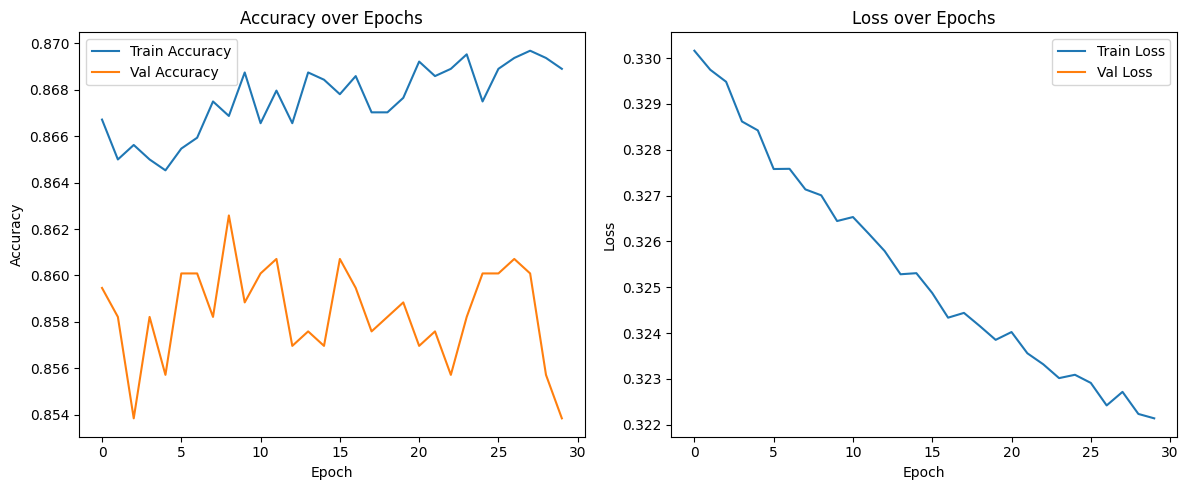

In [ ]:
import matplotlib.pyplot as plt

# Simpan history training
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

# Plot akurasi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


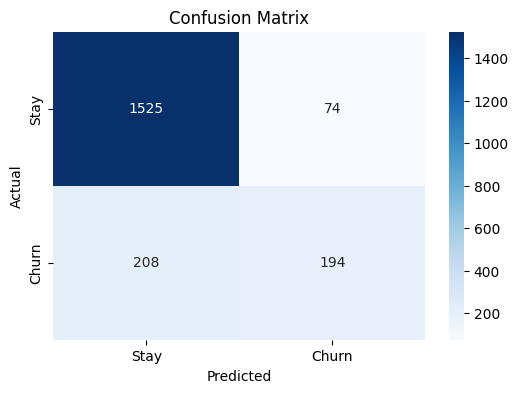

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stay', 'Churn'], yticklabels=['Stay', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
model.save("churn_model.h5")
print("Model saved as churn_model.h5")


Model saved as churn_model.h5


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Hitung bobot untuk setiap kelas
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train),
                                     y=y_train)

# Ubah ke dict: {0: ..., 1: ...}
class_weight_dict = dict(zip(np.unique(y_train), class_weights))
print("Class Weights:", class_weight_dict)


Class Weights: {np.int64(0): np.float64(0.6285153181461115), np.int64(1): np.float64(2.4452933985330074)}


In [ ]:
# Definisikan ulang model jika perlu
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train dengan class_weight
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_split=0.2,
                    class_weight=class_weight_dict,  # Tambahkan ini
                    verbose=1)


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4380 - loss: 0.6965 - val_accuracy: 0.6640 - val_loss: nan
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6738 - loss: 0.6149 - val_accuracy: 0.7127 - val_loss: nan
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7095 - loss: 0.5847 - val_accuracy: 0.7283 - val_loss: nan
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.7240 - loss: 0.5628 - val_accuracy: 0.7545 - val_loss: nan
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7514 - loss: 0.5371 - val_accuracy: 0.7514 - val_loss: nan
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7411 - loss: 0.5299 - val_accuracy: 0.7639 - val_loss: nan
Epoch 7/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7622 - loss: 0.5047 - val_accuracy: 0.7658 - val_loss: nan
Epoch 8/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7699 - loss: 0.4905 - val_accuracy: 0.7589 - val_loss: nan
Epoch 9/30

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1599
           1       0.49      0.72      0.58       402

    accuracy                           0.79      2001
   macro avg       0.70      0.77      0.72      2001
weighted avg       0.83      0.79      0.80      2001

Accuracy: 0.791104447776112


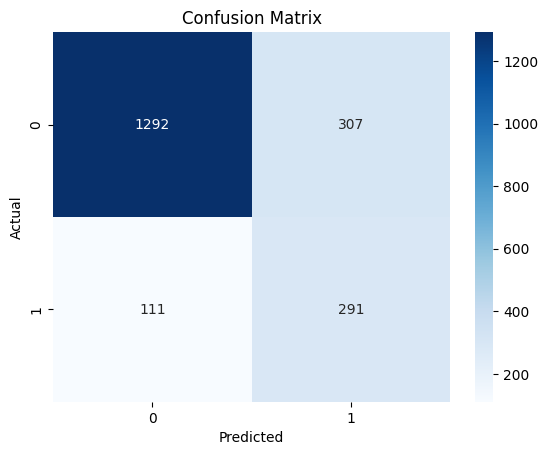

In [ ]:
# Prediksi
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluasi performa
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
